# Funds exploratory

We are going to perform an EDA on several mutual funds.

## Import libraries

In [1]:
library(jsonlite)
source('../src/R/rfunds.R')

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Load data

All the funds start with an initial investment of 100:

In [2]:
df_values <- readRDS("df_values.rds")
head(df_values)

,IE0002639668,IE0007281425,IE0007292083,IE0007471695,IE0007472115,IE0007987690,IE0009591805,IE0031786142,IE0032620787,IE00B03HCZ61,⋯,IE00B5456744,IE00B04GQX83,IE0008248795,IE0031786696,LU1883867761,LU1861133657,LU0625742753,LU0625739619,LU0625739700,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2009-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,⋯,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01
2009-01-02,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-02
2009-01-03,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-03
2009-01-04,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-04
2009-01-05,104.72,101.47,101.48,100.81,100.06,105.26,100.12,108.50,104.73,104.68,⋯,NaN,101.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-05
2009-01-06,107.51,102.01,102.02,102.62,99.29,107.38,99.78,112.41,107.52,107.12,⋯,NaN,103.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-06


In [3]:
txt<-'[{"idFondo":451,"codigoIsin":"IE0002639668","nombre":"Vanguard US 500 Stock Index Inv USD Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":454,"codigoIsin":"IE0007281425","nombre":"Vanguard Japan Stock Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":455,"codigoIsin":"IE0007292083","nombre":"Vanguard Japan Stock Index Inv USD Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":456,"codigoIsin":"IE0007471695","nombre":"Vanguard US Government Bond Idx Inv USD Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":457,"codigoIsin":"IE0007472115","nombre":"Vanguard Euro Government Bond Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":458,"codigoIsin":"IE0007987690","nombre":"Vanguard European Stock Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":459,"codigoIsin":"IE0009591805","nombre":"Vanguard Euro Investment Grade Bond Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":461,"codigoIsin":"IE0031786142","nombre":"Vanguard Emerging Markets Stock Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":463,"codigoIsin":"IE0032620787","nombre":"Vanguard US 500 Stock Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":464,"codigoIsin":"IE00B03HCZ61","nombre":"Vanguard Global Stock Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":466,"codigoIsin":"IE00B04GQQ17","nombre":"Vanguard Eurozone Inflation-Linked Bond Idx Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":467,"codigoIsin":"IE00B04GQT48","nombre":"Vanguard US Investment Grade Credit Idex Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":470,"codigoIsin":"IE00B1W56J03","nombre":"iShares US Index (IE) Instl Acc USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":471,"codigoIsin":"IE00B1W56M32","nombre":"iShares Japan Index (IE) Instl Acc USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":472,"codigoIsin":"IE00B1W56S93","nombre":"iShares Pacific Index (IE) Instl Acc USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":473,"codigoIsin":"IE00B3B2KS38","nombre":"iShares EMU Index (IE) Institutional Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":474,"codigoIsin":"IE00B3D07F16","nombre":"iShares Emerging Markets Index (IE) Instl Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":475,"codigoIsin":"IE00B3D07G23","nombre":"iShares Emerging Markets Index (IE) Instl Acc USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":476,"codigoIsin":"IE00B42W3S00","nombre":"Vanguard Global Small-Cap Index Inv EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":477,"codigoIsin":"IE00B4K9F548","nombre":"iShares Europe Index (IE) Instl Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":479,"codigoIsin":"IE00B4XCK338","nombre":"iShares Ultra High Quality Euro Government Bond Index Fund (IE) Institutional Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":480,"codigoIsin":"IE00B56H2V49","nombre":"iShares Pacific Index (IE) Instl Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":481,"codigoIsin":"IE00B62C5H76","nombre":"iShares Developed World Index (IE) Instl Acc GBP","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":483,"codigoIsin":"IE00B6RVWW34","nombre":"iShares Japan Index (IE) Instl Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":484,"codigoIsin":"IE00B83YJG36","nombre":"iShares Developed Real Estate Index (IE) Instl Acc €","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":485,"codigoIsin":"IE00B89M2V73","nombre":"iShares Developed Real Estate Index (IE) Instl Acc $","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":486,"codigoIsin":"IE00BDFVDR63","nombre":"iShares US Index (IE) Instl Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":490,"codigoIsin":"IE00BGCZ0826","nombre":"Vanguard Global Bond Index Inv USDH Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":493,"codigoIsin":"IE00BH65QK91","nombre":"Vanguard Global Short Term Bond Ix Inv EURH Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":494,"codigoIsin":"LU0389811372","nombre":"Amundi IS MSCI EMU AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":495,"codigoIsin":"LU0389811885","nombre":"Amundi IS MSCI Europe AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":496,"codigoIsin":"LU0389812933","nombre":"Amundi IS JP Morgan GBI Glbl Gvs AHE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":497,"codigoIsin":"LU0390717543","nombre":"Amundi IS MSCI Pacific ex Japan AE-C EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":498,"codigoIsin":"LU0836513266","nombre":"iShares Euro Government Bond Index (LU) A2 EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":499,"codigoIsin":"LU0836513423","nombre":"iShares Euro Aggregate Bond Index (LU) A2 EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":500,"codigoIsin":"LU0836513696","nombre":"iShares Emerging Markets Government Bond Index (LU) A2 USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":501,"codigoIsin":"LU0836513852","nombre":"iShares Global Government Bond Index (LU) A2 USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":502,"codigoIsin":"LU0996176912","nombre":"Amundi IS MSCI Emerging Markets AU-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":503,"codigoIsin":"LU0996177134","nombre":"Amundi IS MSCI Emerging Markets AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":504,"codigoIsin":"LU0996178884","nombre":"Amundi IS S&P 500 AU-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":505,"codigoIsin":"LU0996179007","nombre":"Amundi IS S&P 500 AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":506,"codigoIsin":"LU0996180864","nombre":"Amundi IS MSCI Japan AE-C EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":507,"codigoIsin":"LU0996182308","nombre":"Amundi IS MSCI World AU-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":508,"codigoIsin":"LU0996182563","nombre":"Amundi IS MSCI World AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":509,"codigoIsin":"LU1050470373","nombre":"Amundi IS JP Morgan EMU Govies AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":510,"codigoIsin":"LU1328852659","nombre":"Amundi IS FTSE EPRA NAREIT Global AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":511,"codigoIsin":"LU1373035580","nombre":"iShares Emerging Markets Government Bond Index (LU) A2 EURH","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2304,"codigoIsin":"LU0261952682","nombre":"FF EURO STOXX50 FUND A ACC EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2279,"codigoIsin":"LU1049757120","nombre":"AMUNDI INDEX MSCI NORTH AMERICA  AHE","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2282,"codigoIsin":"IE00B03HD191","nombre":"VANGUARD GLOBAL STOCK INDEX EUR INS","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1993,"codigoIsin":"IE00BYX5NX33","nombre":"Fidelity MSCI World Index Fund P-ACC-EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1994,"codigoIsin":"IE00BYX5NK04","nombre":"Fidelity MSCI World Index Fund P-ACC-USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1995,"codigoIsin":"IE00BYX5MX67","nombre":"Fidelity S&P 500 Index Fund P-ACC-EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2009,"codigoIsin":"IE00BYX5N110","nombre":"Fidelity S&P 500 Index Fund P-ACC-EUR (hedged)","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1996,"codigoIsin":"IE00BYX5MS15","nombre":"Fidelity S&P 500 Index Fund P-ACC-USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1537,"codigoIsin":"LU0625737910","nombre":"Pictet-China Index P EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1607,"codigoIsin":"ES0114105036","nombre":"Bankinter EE.UU. Nasdaq 100 R FI","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1845,"codigoIsin":"LU1328852493","nombre":"Amundi Index Solutions - Amundi Index FTSE EPRA NAREIT Global AE-D","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1705,"codigoIsin":"IE00B246KL88","nombre":"Vanguard 20+ Year Euro Treasury Index Fund EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1990,"codigoIsin":"IE00BYX5MD61","nombre":"Fidelity MSCI Europe Index Fund P-ACC-EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1991,"codigoIsin":"IE00BYX5ML46","nombre":"Fidelity MSCI Europe Index Fund P-ACC-EUR (hedged)","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1992,"codigoIsin":"IE00BYX5NH74","nombre":"Fidelity MSCI Japan Index Fund P-ACC-EUR (hedged)","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2568,"codigoIsin":"LU1883311653","nombre":"AMUNDI EUROPEAN EQ TARGET INC A2 DIS EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":605,"codigoIsin":"ES0149051007","nombre":"IMANTIA IBEX 35 FI","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":546,"codigoIsin":"IE00BD0NCM55","nombre":"iShares Developed World Index (IE) D Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":547,"codigoIsin":"IE00BD0NCN62","nombre":"iShares Developed World Index (IE) D Acc USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":525,"codigoIsin":"IE00BDZS0987","nombre":"iShares US Index (IE) D Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":526,"codigoIsin":"IE00BDRK7T12","nombre":"iShares Japan Index (IE) D Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":527,"codigoIsin":"IE00BDRK7R97","nombre":"iShares Pacific Index (IE) D Acc EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":586,"codigoIsin":"ES0158967036","nombre":"BANKIA INDICE IBEX FI","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1099,"codigoIsin":"LU0836512615","nombre":"iShares World Equity Index Fund (LU) A2 US","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":585,"codigoIsin":"ES0110182039","nombre":"BBVA BOLSA ÍNDICE FI","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2006,"codigoIsin":"IE00BYX5M039","nombre":"Fidelity MSCI Emerging Markets Index Fund P-ACC-USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2008,"codigoIsin":"IE00BYX5P602","nombre":"Fidelity MSCI World Index Fund P-ACC-EUR (hedged)","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1288,"codigoIsin":"ES0148181003","nombre":"Indexa RV Mixta Internacional 75","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1497,"codigoIsin":"IE00B04FFJ44","nombre":"Vanguard Euro Investment Grade Bond Index Fund","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1498,"codigoIsin":"IE00B04GQR24","nombre":"Vanguard Eurozone Inflation-Linked Bond Index Fund Institutional EUR Accumulation","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1506,"codigoIsin":"LU0389812347","nombre":"Amundi Index Solutions - Amundi Index MSCI North America AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1411,"codigoIsin":"LU0474966750","nombre":"PICTET JAPAN INDEX P ACC EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1412,"codigoIsin":"LU0474966834","nombre":"PICTET JAPAN INDEX R ACC EUR ","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1413,"codigoIsin":"LU0474967055","nombre":"PICTET PACIFIC EX JAPAN INDEX P ACC EUR ","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1414,"codigoIsin":"LU0148539108","nombre":"PICTET PACIFIC EX JAPAN INDEX R ACC USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1415,"codigoIsin":"LU0474968020","nombre":"PICTET EMERGING MARKETS INDEX R ACC EUR","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1416,"codigoIsin":"LU1050469367","nombre":"Amundi Index Solutions - Amundi Index Euro AGG Corporate SRI AE-C","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1417,"codigoIsin":"LU1050469441","nombre":"Amundi Index Solutions - Amundi Index Euro AGG Corporate SRI AE-D","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1365,"codigoIsin":"IE00BYWYCC39","nombre":"IShares Emerging Market Index FND D EU","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1425,"codigoIsin":"IE0032125126","nombre":"Vanguard Euro Goverment Bond Index Fund","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1426,"codigoIsin":"IE0002639551","nombre":"Vanguard European Stock USD INS A","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1427,"codigoIsin":"IE00B18GC888","nombre":"Vanguard Global Bond EUR INS","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1428,"codigoIsin":"IE00BH65QN23","nombre":"Vanguard Global Short Term Bond USD INT AC","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1429,"codigoIsin":"IE00B42LF923","nombre":"Vanguard Global Small Cap INS US","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1430,"codigoIsin":"IE0007218849","nombre":"Vanguard Pacific ex-Japan Stock Index  USD INS","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1431,"codigoIsin":"IE0007201266","nombre":"Vanguard Pacific ex-Japan Stock Index EUR INS","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2229,"codigoIsin":"IE00B5456744","nombre":"Vanguard ESG Developed World All Cap Equity Index Fund EUR Acc","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1433,"codigoIsin":"IE00B04GQX83","nombre":"Vanguard US Investment Grade Credit Index USD","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":1445,"codigoIsin":"IE0008248795","nombre":"Vanguard Eurozone Stock Index Fund Investor EUR Acc","sinRetrocesion":true,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2545,"codigoIsin":"IE0031786696","nombre":"VANGUARD EMERG MARKETS STOCK EUR INS","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2341,"codigoIsin":"LU1883867761","nombre":"AMUNDI RUSSIAN EQUITY A ACC EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2374,"codigoIsin":"LU1861133657","nombre":"Amundi Index MSCI World SRI AE ACC EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2389,"codigoIsin":"LU0625742753","nombre":"PICTET RUSSIA INDEX P ACC","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2487,"codigoIsin":"LU0625739619","nombre":"Pictet-India Index P EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false},{"idFondo":2471,"codigoIsin":"LU0625739700","nombre":"Pictet-India Index R EUR","sinRetrocesion":false,"tipoProductoEnum":"FONDOS_INDEXADOS","descatalogado":false}]'
funds <- fromJSON(txt=txt)
head(funds)

,idFondo,codigoIsin,nombre,sinRetrocesion,tipoProductoEnum,descatalogado
,<int>,<chr>,<chr>,<lgl>,<chr>,<lgl>
1,451,IE0002639668,Vanguard US 500 Stock Index Inv USD Acc,TRUE,FONDOS_INDEXADOS,FALSE
2,454,IE0007281425,Vanguard Japan Stock Index Inv EUR Acc,TRUE,FONDOS_INDEXADOS,FALSE
3,455,IE0007292083,Vanguard Japan Stock Index Inv USD Acc,TRUE,FONDOS_INDEXADOS,FALSE
4,456,IE0007471695,Vanguard US Government Bond Idx Inv USD Acc,TRUE,FONDOS_INDEXADOS,FALSE
5,457,IE0007472115,Vanguard Euro Government Bond Index Inv EUR Acc,TRUE,FONDOS_INDEXADOS,FALSE
6,458,IE0007987690,Vanguard European Stock Index Inv EUR Acc,TRUE,FONDOS_INDEXADOS,FALSE


## Data Analysis

First we calculate the ROI over a sliding window of one year for all the funds

In [4]:
df_roi<-calc_roi(df_values, num_days=365)

We can calculate a summary of the bonds:
* **mean:** Aritmetic mean of all the ROI values calculated over a sliding window
* **geom:** Geometric mean of all the ROI values calculated over a sliding window
* **var:** Variance of all the ROI values calculated over a sliding window
* **mindate:** Starting date of the fund history
* **days_losses:** Maximum number of consecutive losses the fund has experienced

In [5]:
df_summary<-calc_summary(df_values, num_days=365)
head(df_summary)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
ES0110182039,1.0276148,1.0114882,0.0334738565,2009-01-01,408
ES0114105036,1.1813303,1.1750825,0.0150356278,2009-01-01,49
ES0148181003,1.0213112,1.0208589,0.0009076922,2019-04-05,27
ES0149051007,0.9857933,0.9748317,0.0218260619,2016-06-10,352
ES0158967036,1.0266974,1.0109134,0.0326901214,2009-01-01,408
IE0002639551,1.0858868,1.0782053,0.0167480127,2009-01-01,223


LU0996182563 Amundi Is Msci World Ae-C

LU1882445999 Amundi Fds China Equity C Eur C

LU0996179007 Amundi Is Sp 500 Ae-A

In [6]:
portfolio<-rbind(
funds[grepl("China",funds$nombre),c("codigoIsin","nombre")],
funds[grepl("Amundi",funds$nombre),c("codigoIsin","nombre")],
funds[grepl("Vanguard",funds$nombre),c("codigoIsin","nombre")]
)
portfolio

,codigoIsin,nombre
,<chr>,<chr>
56,LU0625737910,Pictet-China Index P EUR
30,LU0389811372,Amundi IS MSCI EMU AE-C
31,LU0389811885,Amundi IS MSCI Europe AE-C
32,LU0389812933,Amundi IS JP Morgan GBI Glbl Gvs AHE-C
33,LU0390717543,Amundi IS MSCI Pacific ex Japan AE-C EUR
38,LU0996176912,Amundi IS MSCI Emerging Markets AU-C
39,LU0996177134,Amundi IS MSCI Emerging Markets AE-C
40,LU0996178884,Amundi IS S&P 500 AU-C
41,LU0996179007,Amundi IS S&P 500 AE-C


In [7]:
df_summary<-calc_summary(df_values[,c("date",portfolio$codigoIsin)], num_days=365)
head(df_summary)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
IE0002639551,1.085887,1.078205,0.01674801,2009-01-01,223
IE0002639668,1.157923,1.152276,0.01339324,2009-01-01,120
IE0007201266,1.050654,1.042610,0.01664948,2014-02-27,283
IE0007218849,1.102775,1.090213,0.03057850,2009-01-01,283
IE0007281425,1.085698,1.078537,0.01611870,2009-01-01,193
IE0007292083,1.085743,1.078574,0.01613771,2009-01-01,193


In [8]:
historic_portfolio<- rownames(df_summary)[df_summary$mindate<'2017-01-01' & df_summary$geom>1.04]
historic_portfolio

[1] "IE0002639551" "IE0002639668" "IE0007201266" "IE0007218849" "IE0007281425"
 [6] "IE0007292083" "IE0007471695" "IE0007987690" "IE0008248795" "IE0031786142"
[11] "IE0032620787" "IE00B03HCZ61" "IE00B04GQT48" "IE00B04GQX83" "IE00B246KL88"
[16] "IE00B42LF923" "IE00B42W3S00" "IE00B5456744" "IE00BH65QN23" "LU0389811372"
[21] "LU0389811885" "LU0389812347" "LU0390717543" "LU0625737910" "LU0996176912"
[26] "LU0996177134" "LU0996178884" "LU0996179007" "LU0996180864" "LU0996182308"
[31] "LU0996182563"

In [9]:
coefs <- calc_optim(na.omit(df_roi[,historic_portfolio]), variance_importance=100)


Iter: 1 fn: -0.2504	 Pars:  8.527e-08 2.378e-08 2.846e-08 2.851e-08 9.832e-09 9.824e-09 7.568e-08 8.565e-08 3.836e-05 1.152e-01 2.379e-08 3.375e-08 2.996e-08 3.011e-08 3.290e-01 3.450e-08 3.455e-08 3.611e-08 3.580e-01 1.978e-01 7.161e-08 2.667e-08 1.770e-08 3.612e-11 1.559e-06 1.103e-06 2.459e-08 2.425e-08 9.043e-09 3.551e-08 3.537e-08
Iter: 2 fn: -0.2504	 Pars:  8.516e-08 2.374e-08 2.842e-08 2.846e-08 9.805e-09 9.796e-09 7.559e-08 8.554e-08 3.819e-05 1.152e-01 2.375e-08 3.370e-08 2.991e-08 3.006e-08 3.290e-01 3.445e-08 3.450e-08 3.605e-08 3.580e-01 1.978e-01 7.152e-08 2.662e-08 1.767e-08 1.961e-11 1.558e-06 1.102e-06 2.454e-08 2.421e-08 9.017e-09 3.546e-08 3.532e-08
solnp--> Completed in 2 iterations


This is the optimul ratio of coefficients for each fund:

IE0031786142 IE00B246KL88 IE00BH65QN23 LU0389811372 
      0.1152       0.3290       0.3580       0.1978

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.063408,1.060452,0.006608408,2014-01-31,146
IE0031786142,1.062441,1.052514,0.020722483,2014-01-31,221
IE00B246KL88,1.089988,1.083711,0.014247623,2014-01-31,205
IE00BH65QN23,1.052765,1.048439,0.009320616,2014-01-31,386
LU0389811372,1.051043,1.043272,0.016192231,2014-01-31,221


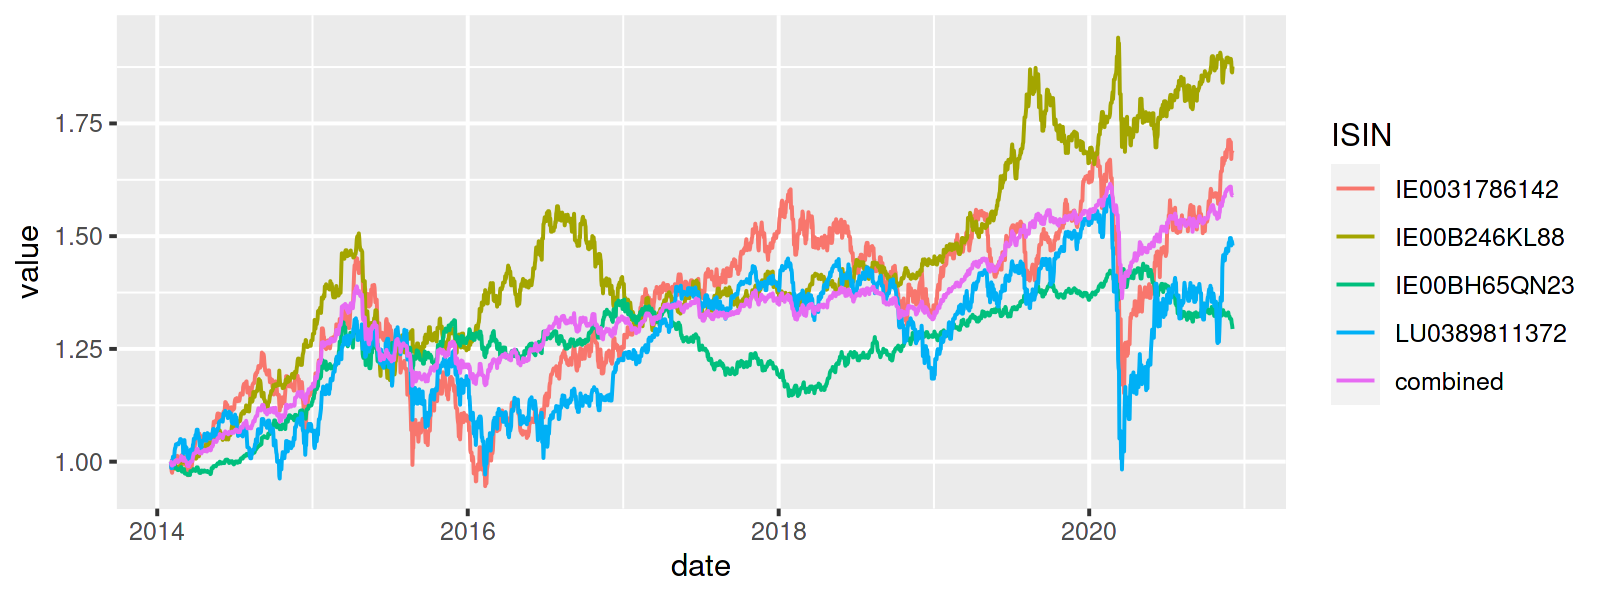

In [68]:
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))
calc_summary(df_sim,num_days = 365)

In [69]:

df_subset<-df_roi %>% filter(date>'2016-01-01') %>% select(all_of(historic_portfolio)) %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=100)
coefs


Iter: 1 fn: -0.3022	 Pars:  0.0000000434054 0.0000000233809 0.0000000004585 0.0000000004589 0.0590355434469 0.0588984302372 0.0000000385257 0.0000000431485 0.0000014664201 0.0000000280701 0.0000000233933 0.0000000202621 0.0000000123184 0.0000000123566 0.1763310559366 0.0000001511098 0.0000001505257 0.0000000207173 0.5580369412877 0.0238380600653 0.0000000398893 0.0000000165730 0.0000000002776 0.1238565234525 0.0000000247339 0.0000000248546 0.0000000230469 0.0000000231216 0.0000012178536 0.0000000204465 0.0000000202253
Iter: 2 fn: -0.3022	 Pars:  4.237e-08 2.270e-08 1.850e-10 1.853e-10 5.904e-02 5.890e-02 3.757e-08 4.211e-08 1.454e-06 2.730e-08 2.271e-08 1.964e-08 1.183e-08 1.187e-08 1.763e-01 1.481e-07 1.476e-07 2.008e-08 5.580e-01 2.384e-02 3.892e-08 1.601e-08 7.269e-12 1.239e-01 2.403e-08 2.415e-08 2.237e-08 2.244e-08 1.196e-06 1.982e-08 1.960e-08
solnp--> Completed in 2 iterations


IE0007281425 IE0007292083 IE00B246KL88 IE00BH65QN23 LU0389811372 LU0625737910 
  0.05900590   0.05890589   0.17631763   0.55805581   0.02380238   0.12391239

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.072406,1.068548,0.008957602,2014-01-31,131
IE0007281425,1.087308,1.079223,0.018683496,2014-01-31,193
IE0007292083,1.087313,1.079227,0.018686601,2014-01-31,193
IE00B246KL88,1.089988,1.083711,0.014247623,2014-01-31,205
IE00BH65QN23,1.052765,1.048439,0.009320616,2014-01-31,386
LU0389811372,1.051043,1.043272,0.016192231,2014-01-31,221
LU0625737910,1.131325,1.108384,0.051489254,2014-01-31,230


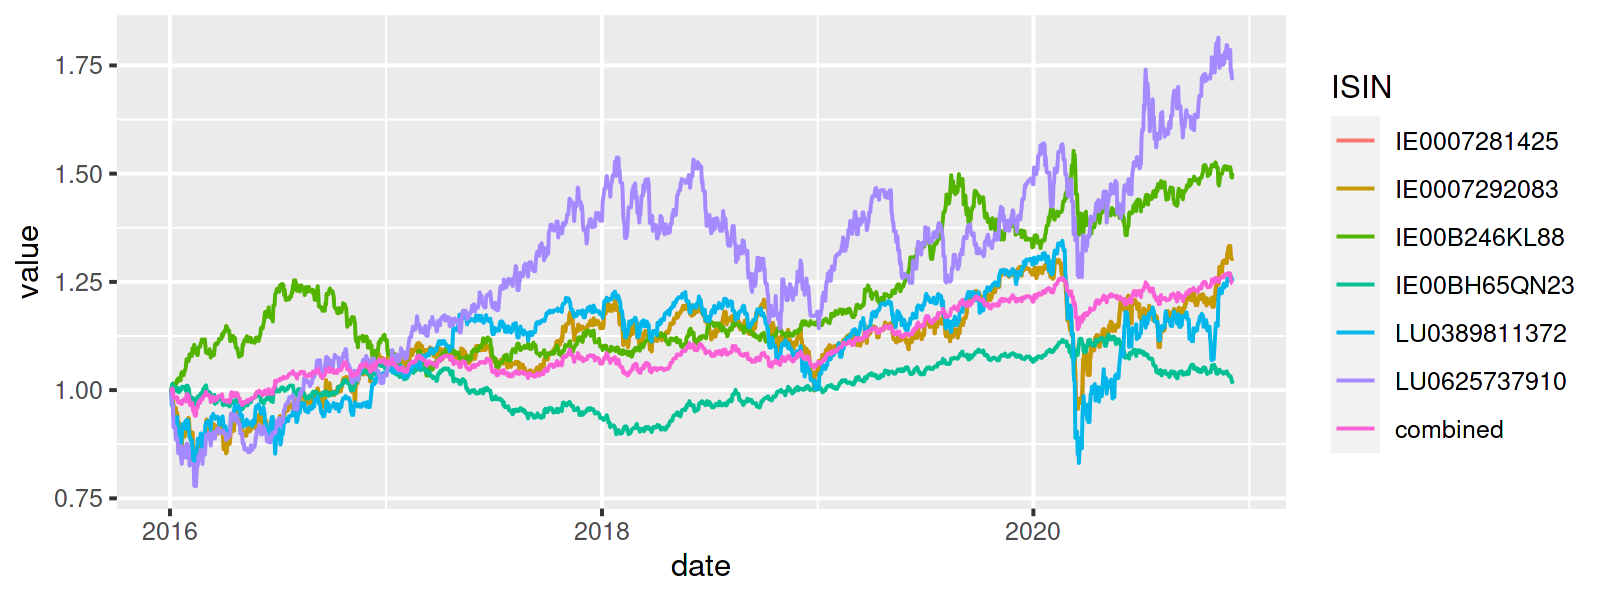

In [70]:
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2016-01-01')
calc_summary(df_sim,num_days = 365)


Iter: 1 fn: -0.03389	 Pars:  0.68392 0.18456 0.13152
Iter: 2 fn: -0.03389	 Pars:  0.68392 0.18456 0.13152
solnp--> Completed in 2 iterations


IE00BH65QN23 LU0625737910 IE00B246KL88 
      0.6839       0.1846       0.1315

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.071170,1.067228,0.009136658,2014-01-31,157
IE00B246KL88,1.089988,1.083711,0.014247623,2014-01-31,205
IE00BH65QN23,1.052765,1.048439,0.009320616,2014-01-31,386
LU0625737910,1.131325,1.108384,0.051489254,2014-01-31,230


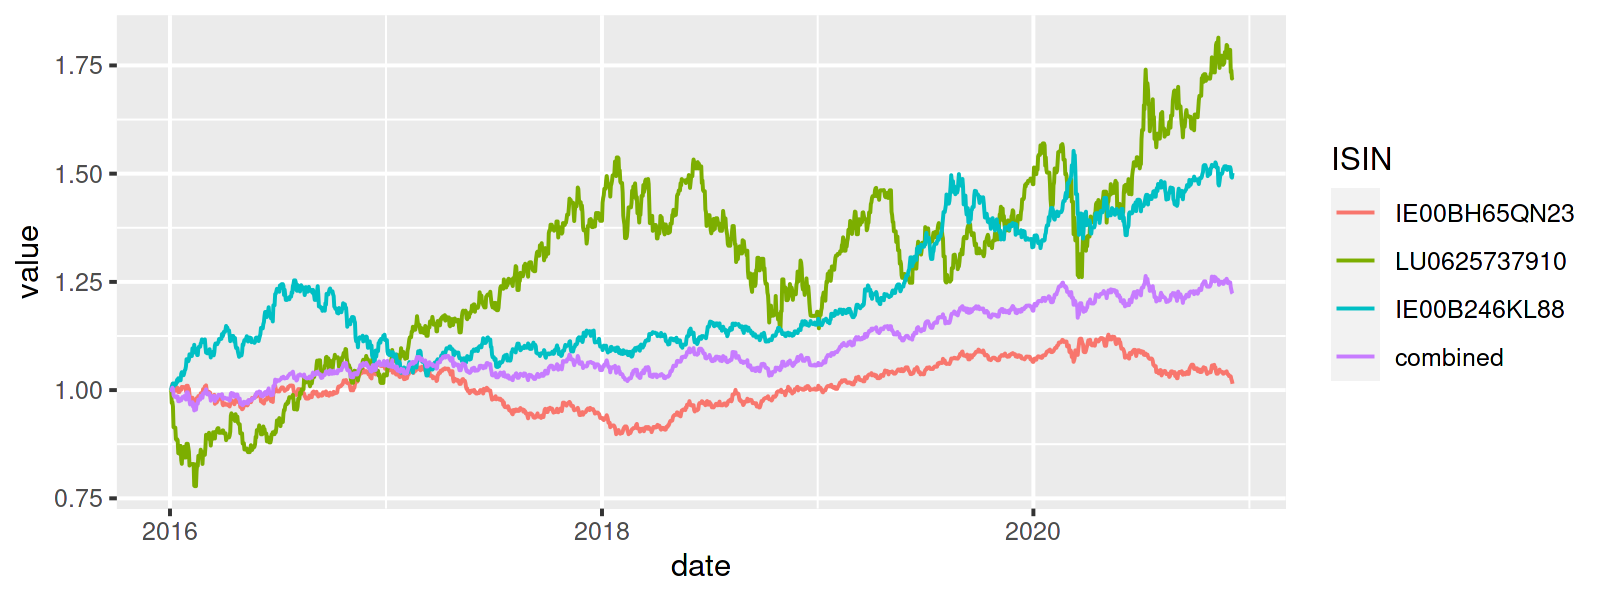

In [74]:
df_subset<-df_roi %>% filter(date>'2016-01-01') %>% select(IE00BH65QN23,LU0625737910,IE00B246KL88) %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=1000)
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2016-01-01')
calc_summary(df_sim,num_days = 365)


Iter: 1 fn: -0.0744	 Pars:  0.69979000430 0.30020995896 0.00000003674
Iter: 2 fn: -0.0744	 Pars:  0.69979002423 0.30020996300 0.00000001276
solnp--> Completed in 2 iterations


IE00BH65QN23 LU0625737910 
      0.6998       0.3002

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.074650,1.069490,0.011903924,2014-01-31,212
IE00BH65QN23,1.052765,1.048439,0.009320616,2014-01-31,386
LU0625737910,1.131325,1.108384,0.051489254,2014-01-31,230


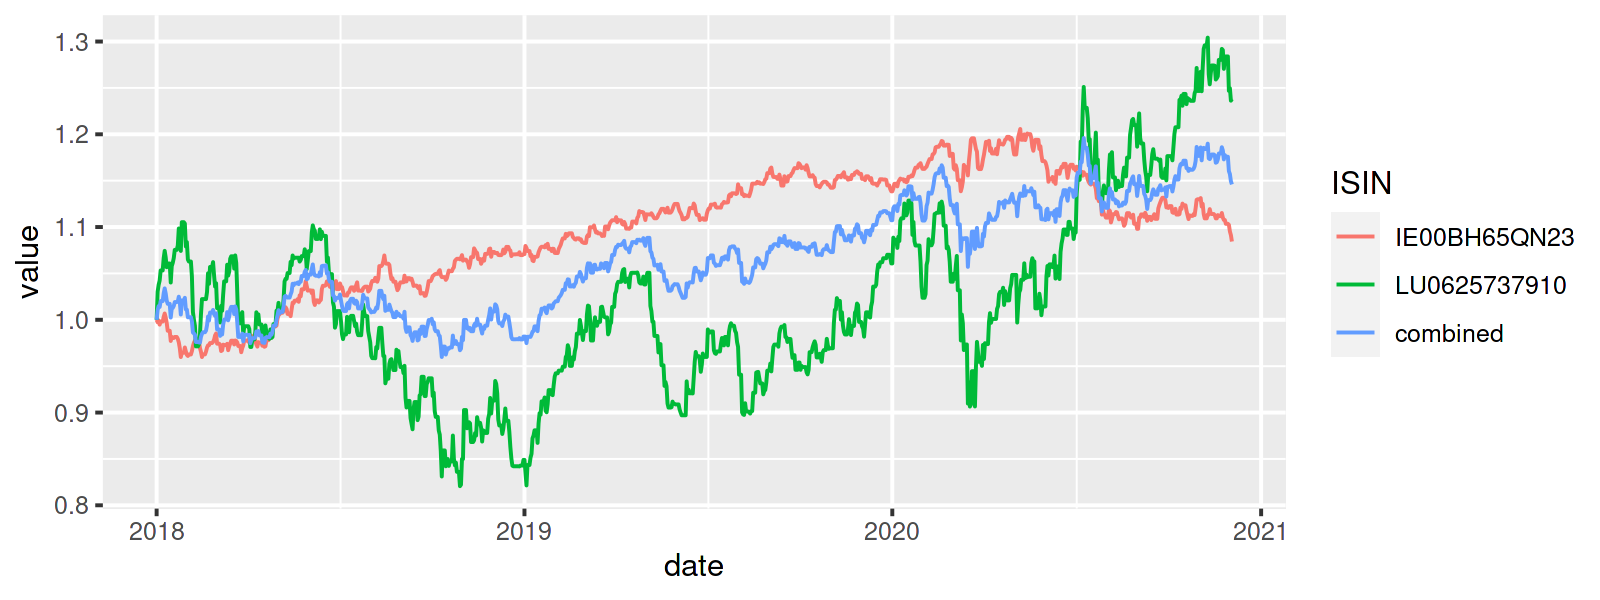

In [75]:
df_subset<-df_roi %>% filter(date>'2018-01-01') %>% select(IE00BH65QN23,LU0625737910,IE00B246KL88) %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=1000)
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2018-01-01')
calc_summary(df_sim,num_days = 365)